In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
dataset = pd.read_csv('E:/ML Telangana Project/IMD Rainfall 0.25x0.25/CSV Files/rain_Point_1.csv', index_col = 0, parse_dates= True)
dataset = dataset.asfreq('D')

In [3]:
dataset['RAINFALL'] = dataset['RAINFALL'].astype(np.float)

In [4]:
dataset.head()

LONGITUDE  LATITUDE  RAINFALL
TIME                                     
1951-01-01      81.75      16.5       0.0
1951-01-02      81.75      16.5       0.0
1951-01-03      81.75      16.5       0.0
1951-01-04      81.75      16.5       0.0
1951-01-05      81.75      16.5       0.0

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25568 entries, 1951-01-01 to 2020-12-31
Freq: D
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LONGITUDE  25568 non-null  float64
 1   LATITUDE   25568 non-null  float64
 2   RAINFALL   25565 non-null  float64
dtypes: float64(3)
memory usage: 799.0 KB


In [6]:
# we can see that there are 3 null values for rainfall, we will fill them with the median of the data
dataset['RAINFALL'].fillna(method='ffill', inplace= True)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25568 entries, 1951-01-01 to 2020-12-31
Freq: D
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LONGITUDE  25568 non-null  float64
 1   LATITUDE   25568 non-null  float64
 2   RAINFALL   25568 non-null  float64
dtypes: float64(3)
memory usage: 799.0 KB


In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose

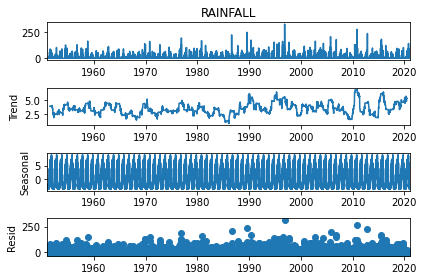

In [9]:
decomposed = seasonal_decompose(dataset['RAINFALL'], period= 365)
decomposed.plot();
#decomposing the dataset into trend and seasonality

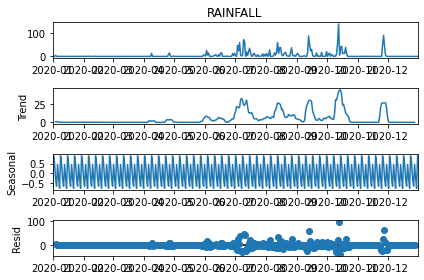

In [10]:
decomposed_2020 = seasonal_decompose(dataset['RAINFALL'][-366:])
decomposed_2020.plot();
#decomposing the dataset for the latest year to get a better idea

Text(0, 0.5, 'Rainfall (mm)')

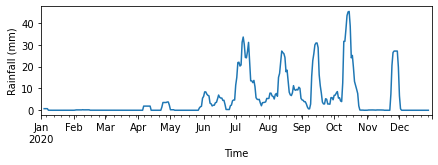

In [11]:
decomposed_2020.trend.plot(figsize= (7, 2))
plt.xlabel('Time')
plt.ylabel('Rainfall (mm)')
# as expected, the rainfall is maximum during the monsoon and the retreating monsoon

Text(0.5, 0, 'Time')

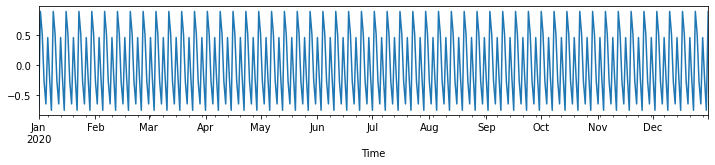

In [12]:
decomposed_2020.seasonal.plot(figsize= (12, 2))
plt.xlabel('Time')

Text(0.5, 1.0, 'Box Plot for last twenty years')

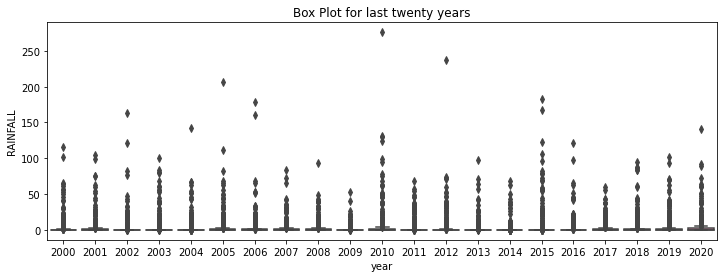

In [13]:
# Import Data
df = pd.read_csv('E:/ML Telangana Project/IMD Rainfall 0.25x0.25/CSV Files/rain_Point_1.csv', parse_dates=['TIME'], index_col='TIME')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.TIME]
df['month'] = [d.strftime('%b') for d in df.TIME]
years = df['year'].unique()

# Draw Plot
fig = plt.figure(figsize= (12, 4))
sns.boxplot(y=df.loc[df['year'].isin(range(2000, 2021)),'RAINFALL'],
             x=df.loc[df['year'].isin(range(2000, 2021)),'year'])
plt.title('Box Plot for last twenty years')

Text(0.5, 1.0, 'Box Plot for Rainfall in different months')

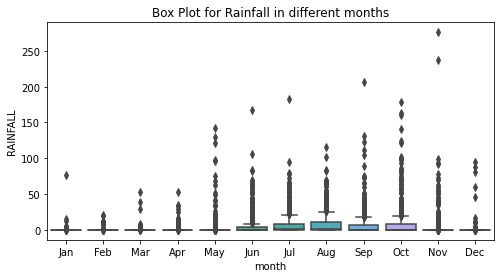

In [14]:
# Draw Plot
fig = plt.figure(figsize= (8, 4))
sns.boxplot(y=df.loc[df['year'].isin(range(2000, 2021)),'RAINFALL'],
             x=df.loc[df['year'].isin(range(2000, 2021)),'month'])
plt.title('Box Plot for Rainfall in different months')

In [15]:
y_train = dataset[dataset.index < '2015-01-01' and dataset.index > '1984-01-01'].iloc[:, -1]
y_test = dataset[dataset.index > '2015-01-01'].iloc[:, -1]

In [16]:
from statsmodels.tsa.stattools import adfuller, kpss

In [17]:
def test_adf(series, title= ''):
    dfout = {}
    dftest = adfuller(series, autolag= 'AIC', regression= 'ct')
    for key, val in dftest[4].items():
        dfout[f'critical value ({key})'] = val
    print(f'ADF Statistic: {dftest[0]}')
    print(f'p-value: {dftest[1]}')
    print('significance level = 0.05')
    if dftest[1] <= 0.05:
        print('Reject the Null Hypothesis')
        print('The series is stationary')
    else:
        print('Do not reject the Null Hypothesis')
        print('The series is not stationary')

In [18]:
test_adf(y_train, 'RAINFALL')

ADF Statistic: -16.48057528102338
p-value: 0.0
significance level = 0.05
Reject the Null Hypothesis
The series is stationary


In [19]:
def test_kpss(series, title= ''):
    dfout = {}
    dftest = kpss(series, regression= 'c')
    for key, val in dftest[3].items():
        dfout[f'critical value ({key})'] = val
    print(f'ADF Statistic: {dftest[0]}')
    print(f'p-value: {dftest[1]}')
    print('significance level = 0.05')
    if dftest[1] >= 0.05:
        print('Reject the Null Hypothesis')
        print('The series is stationary')
    else:
        print('Do not reject the Null Hypothesis')
        print('The series is not stationary')

In [20]:
test_kpss(y_train, 'RAINFALL')

ADF Statistic: 0.1457280389194715
p-value: 0.1
significance level = 0.05
Reject the Null Hypothesis
The series is stationary
C:\Users\nipun\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\nipun\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [21]:
# this means the series is already stationary
# value of d for ARIMA = 0

In [22]:
import statsmodels.api as sm

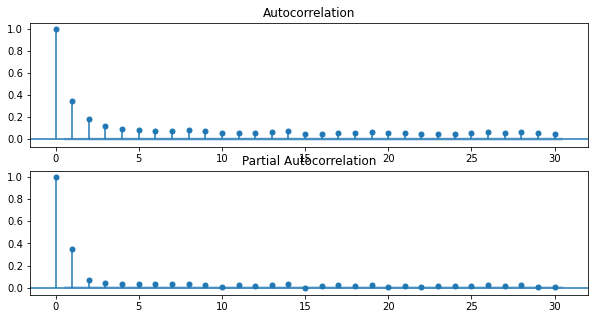

In [23]:
fig, ax = plt.subplots(2, 1, figsize= (10, 5))
fig = sm.graphics.tsa.plot_acf(y_train, lags= 30, ax= ax[0])
fig = sm.graphics.tsa.plot_pacf(y_train, lags= 30, ax= ax[1])

In [24]:
# from the above graphs, putting p = 0, q = 0

In [25]:
# p, d, q = 0, 0, 0

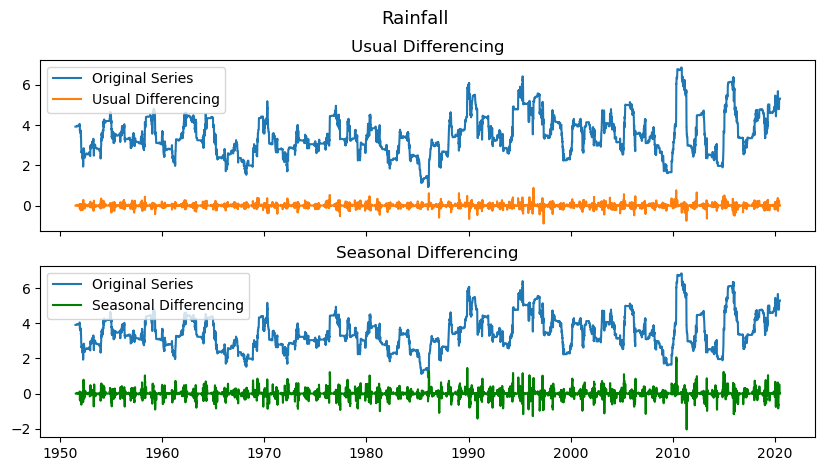

In [26]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(decomposed.trend, label='Original Series')
axes[0].plot(decomposed.trend.diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Differencing
axes[1].plot(decomposed.trend, label='Original Series')
axes[1].plot(decomposed.trend.diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Rainfall', fontsize=13)
plt.show()

In [27]:
# from pmdarima.arima import auto_arima

In [28]:
# smodel = auto_arima(decomposed_y_train, start_p=1, start_q=1,
#                          test='adf',
#                          max_p=2, max_q=2, m= 12,
#                          start_P=0, seasonal=True,
#                          d=None, trace=True,
#                          error_action='ignore',  
#                          suppress_warnings=True, 
#                          stepwise=True)

In [29]:
# smodel.summary()

In [30]:
mod = ARIMA(y_train,
            order=(1, 0, 1),
            seasonal_order=(1, 0, 1, 365),
            enforce_stationarity=False,
            enforce_invertibility=False)
results = mod.fit(method='innovations_mle', low_memory=True, cov_type='none')

In [31]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                    
=======================================================================================
Dep. Variable:                        RAINFALL   No. Observations:                23376
Model:             ARIMA(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood              -89482.961
Date:                         Sat, 03 Apr 2021   AIC                         178977.923
Time:                                 09:27:07   BIC                         179026.277
Sample:                             01-01-1951   HQIC                        178993.625
                                  - 12-31-2014                                         
Covariance Type:                  Not computed                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4056        nan        nan        nan         nan         nan
ar.L1          0.5327        nan        nan        nan         nan         nan
ma.L1         -0.2222        nan        nan        nan         nan         nan
ar.S.L7        0.8181        nan        nan        nan         nan         nan
ma.S.L7       -0.7778        nan        nan        nan         nan         nan
sigma2       124.0202        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):          10152929.57
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               1.75   Skew:                             7.21
Prob(H) (two-sided):                  0.00   Kurtosis:                       104.09
===================================================================================

Warnings:
[1] Covariance matrix not calculated.
"""

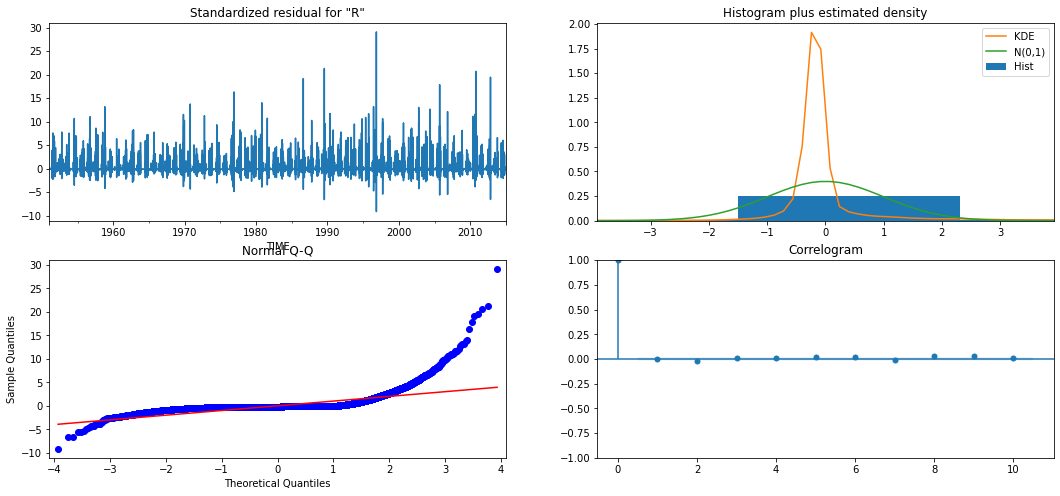

In [32]:
results.plot_diagnostics(figsize=(18, 8));

In [33]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-02'), end= '2020-12-31', dynamic=False)
y_forecast = pred.predicted_mean

In [34]:
actual = pd.DataFrame(y_test)
predictions = pd.DataFrame(y_forecast)
predictions.reset_index(drop= True, inplace= True)
predictions.index = actual.index
results_df = actual.join(predictions)

In [35]:
results_df.rename(columns= {'RAINFALL':'Actual', 'predicted_mean':'Predicted'}, inplace= True)

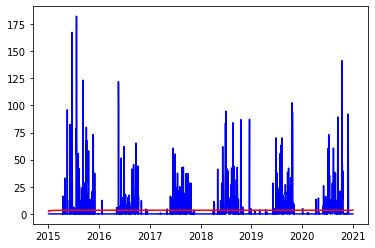

In [36]:
plt.plot(results_df['Actual'], c= 'blue')
plt.plot(results_df['Predicted'], c= 'red')